# Acting Out

Anthony Finch

---

In my first two blog posts, [Is Bigger Really Better?](https://ajfinch123.github.io/ml/ai/unsupervised/compression/2020/08/31/is_bigger_better.html) and [Honey, I Shrunk the Data](https://ajfinch123.github.io/ml/ai/unsupervised/compression/2020/09/08/shrunk_data.html), we started to explore some of the basics of *Unsupervised Learning*.

Before we move on to today's topic, let's review some of these basic concepts and make sure that we have a firm grasp on how all of this material fits together.

**Definitions**

**Unsupervised Learning** is a type of Machine Learning which attempts to draw insights from data without predicting a specific, external target.

**Dimensionality Reduction** is a sub-class of unsupervised learning algorithms which focuses on squishing information from many features into a smaller number of features.

**Clustering** is another sub-class of unsupervised learning, which is actually derived from dimensionality reduction.

**Anomaly Detection** is the final sub-class of unsupervised learning applications, which focuses on detecting outliers.


## Review of Dimensionality Reduction

In *Honey, I Shrunk the Data*, we discussed two dimensionality-reduction techniques which followed the same design pattern.  Most versions of dimensionality reduction use the following generalized process to transform data.

1. Transform the data (with $N$ features) into a smaller number of features ($M$).
2. Transform the data back to the original $N$ features.
3. Minimize the reconstruction error.

<img src = ./img/dim_red.jpg>

Some algorithms don't follow this pattern (e.g. [T-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and [KPCA](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis); however, this pattern is easily understandable and widely used.  More complicated techniques attempt to accomplish similar results using slightly different optimization metrics.

### Dimensionality Reduction in Practice

Believe it or not, the simple algorithms we discussed last week are the basis for a huge amount of modern machine learning.  While the specific algorithm is a slight twist on the original concept that we presented last week, our work with a simple autoencoder will actually help us to understand one of the most powerful tricks in machine learning.  In this notebook, we're going to take some time to explore a very specific application of dimensionality reduction and how it has revolutionized fields as diverse as Natural Language Processing, medical machine learning, and Artificial Intelligence.


# The Language Problem

Human language is unbelievably complicated.  [The English language has somewhere around half a million words](https://en.wikipedia.org/wiki/List_of_dictionaries_by_number_of_words), depending on how you count them.  We have complicated rules for how to use words, which sometimes contradict one another.  Many of us couldn't even list out all of the rules that we use to speak 'conversational English', even though we intuitively understand that there's something *seriously* off about the way that Yoda speaks.

In the early [noughties](https://dictionary.cambridge.org/us/dictionary/english/noughties), there was a lot of interest in getting computers to 'understand' human language.  There are lots of applications for this kind of work.  Spam blockers, chat bots, Google Translate, and thousands of other applications could be massively improved - if only we could get computers to understand what words meant.

## The Traditional Approach

Traditionally, language modelers had to use gigantic feature vectors to represent words.  If you wanted to predict the meaning of a sentence, you'd have to put a 'check-mark' next to every word in that sentence.  Then, you could classify that sentence.  This is known as a 'sparse' representation of language, since we have so many words that *don't* occur in any given sentence or document.

This representation of language is extremely inefficient.  It treats words as having no relationships with one another- the model can't see that *cat* and *kitten* are related in some way, so it has to learn all sorts of rules for the word 'cat', and then re-learn all of those rules for the word 'kitten'.

Here's an example:

Suppose I say: 'This is a sentence.'

I might also say: 'This is a kitten.'

Even if you didn't understand English, you'd probably be able to use your intuition to realize that almost any non-specific noun can go into that last spot.  That final word could be 'teapot' or 'train' or 'president.'  This makes sense because you've internalized the idea that all of these words are part of a class of non-specific nouns.  For instance, if I used the sentence 'This is a slow', it wouldn't make sense.

Unfortunately, a sparse language model will never learn to make those leaps.  It would have to learn separately, for *every single word*, that 'This is a _____' was appropriate or inappropriate.  What are you doing that makes you so much smarter than a sparse language model?

## Context Clues

If you've been through the American educational system, you may remember frequent discussion of 'context clues' in your English language classes.  The idea behind context clues is that you can usually figure out what a word means by examining the words around it.  For example, I might say *"I hate her.  She's rude and churlish."*  Maybe you already know that [churlish](https://www.merriam-webster.com/dictionary/churlish) is just a little-used pseudo-synonym for 'vulgar.'  But even if you didn't, there are plenty of context clues to tell you that it's probably just another way of saying that someone is rude.

If you did infer that, you probably did so by examining the words around it.  You know that this particular word is an adjective, based on its placement in the sentence.  You know that it's probably negative, since I'm explaining why I don't like someone.  And, since I also mentioned that this particular woman is rude, you can probably infer that *churlish* is a word that means something similar to *rude*.  In short, you were able to understand a suspect word by comparing it to the words around it.

<img src=./img/w2v_sentence.jpg>

This is one of the key secrets that makes you so much better at understanding language than a traditional sparse language model - you can use the context around a word to help you modulate your understanding of that word.

## Compressed Language Representation

Our next question is: how do we turn this insight into a better language model?

To accomplish this task, we're going to use dimensionality reduction as we discussed in *Honey, I Shrunk the Data*.  Our goal is to create a compressed set of features that will be able to help our language algorithms recognize that some words are similar to other words in very particular ways.  We noticed above that humans tend to learn to understand words by looking at the context around those words.  We can combine these two insights to create a remarkably effective model.

We're going to slightly modify our rules from last week to create three new goals.  Now, we're going to try and create an encoding algorithm for a given word; however, instead of compressing the vector for just that word, we're going to compress the vector for that word's context in order to obtain that word.

1. The words *around* a particular word are our inputs.
2. The output is a smaller vector than the input (fewer dimensions than the number of words in the English language).
3. We want to predict the word in question.

We can construct an algorithm that's almost exactly like our autoencoder from *Honey, I Shrunk the Data* which fits all of these requirements.

<img src=./img/w2v_sparse_to_dense.jpg>

This is, in fact, a solution that was first [proposed by some researchers at Google in 2013](https://arxiv.org/pdf/1301.3781.pdf).  Of course, there are a few slight differences.  Their algorithm didn't use unimportant 'stop words' (a, the, specific names, etc.), and they also proposed an alternative algorithm which flipped the problem around (using a specific word to predict its context).  For now, though, we're just going to concentrate on the simplest possible implementation of this algorithm, dubbed Word2Vec.

# Custom Implementation of Word2Vec

Below, we're going to use our `fake_PCA()` code from last week to implement a Word2Vec transformer.  Our transformer is going to build its own dictionary or words (it can't map words it hasn't seen before), then use a simple linear transformation down to a small, 2-dimensional representation to embed the words.  Then, it will use another simple linear transformation to predict the 'missing' word based on the context.

This isn't really a transformer that's ready for 'prime time.'  It doesn't use a lot of nice features that other packages (particularly [Gensim](https://radimrehurek.com/gensim/)) have implemented; however, it is extremely simple to interact with this transformer and understand how it works.  To train effectively the same model, but with a much better (if more opaque) implementation, use Gensim's [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html) model with the `sg = 0` parameter setting.

In [6]:
"""This is an extremely simplified version of a Word2Vec transformer.

This implementation of a W2V transformer trains on a set of documents
presented as a list-of-lists, where each sub-list contains words to be modeled.
In order to make this code as simple and intuitive as possible, we employ a full
one-hot representation of the word vectors; in other words, we employ Dense()
layers for the neural model, as opposed to an Embedding() layer.  This accomplishes
the same task without presenting readers with a new (and potentially unintuitive)
concept using TF embedding layers.  This is **extremely inefficient** and this
transformer should not be used for any large datasets.
"""

from sklearn.base import TransformerMixin
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense

import pandas as pd
import numpy as np

class W2V(TransformerMixin):
    
    def __init__(self, k = 2):
        self.k = k
        self.word_dict = dict()
        self.w2v_mod = None
        self.v2w_mod = None
        
    def _build_model(self):
        
        inputs = Input(shape = (len(self.word_dict),))
        w2v_feats = Dense(self.k, activation = 'linear')(inputs)
        #Softmax means we're going to be predicting which class is correct out of a selection of mutually exclusive classes
        recon_func = Dense(len(self.word_dict), activation = 'softmax')
        
        recon_feats = recon_func(w2v_feats)
        
        v_inputs = Input(shape = (self.k,))
        recon_feats_partial = recon_func(v_inputs)
        
        self.w2v = Model(inputs = inputs, outputs = w2v_feats)
        self.full_w2v_mod = Model(inputs = inputs, outputs = recon_feats)
        self.inv_mod = Model(inputs = v_inputs, outputs = recon_feats_partial)
        
        self.full_w2v_mod.compile(optimizer = 'adam', loss = 'binary_crossentropy')

    def _build_dict(self, docs):
        all_words = pd.Series([x for doc in docs for x in doc]).unique()
        
        self.word_dict = {all_words[i]:i for i in range(len(all_words))}
        
    def _build_train_data(self,docs,dist):
        data_ls = []
        target_ls = []
        
        for doc in docs:
            for i in range(len(doc)):
                context_words = doc[(i-dist):max((i-1),0)] + doc[(i+1):(i+dist)]
                tmp_context = np.zeros(len(self.word_dict))
                for word in context_words:
                    tmp_context[self.word_dict[word]] += 1
                
                data_ls.append(tmp_context)
                
                tmp_target = np.zeros(len(self.word_dict))
                tmp_target[self.word_dict[doc[i]]] = 1
                
                target_ls.append(tmp_target)
                
        return np.stack(data_ls), np.stack(target_ls)
        
    #SKLearn transformers should take y as an optional argument, even when it isn't necessary, to make sure that they can work with pipelines
    def fit(self, data, y = None, n_epochs = 10, batch_size = 100, dist = 5): 
        self._build_dict(data)
        self._build_model()
        
        data, target = self._build_train_data(data, dist)
        
        self.full_w2v_mod.fit(
            data,
            target,
            epochs = n_epochs,
            batch_size = batch_size
        )
        
        return self
    
    def transform(self, word_ls):
        data = []
        for word in word_ls:
            tmp = np.zeros(len(self.word_dict))
            tmp[self.word_dict[word]] = 1
            data.append(tmp)
        return self.w2v.predict(np.stack(data))

### Training a Toy Model

Now that we have our transformer, let's build a *corpus* - this is just a list of 'documents' (in this case sentences) that we want to use in our model.

In [28]:
docs = [
    'this is my first sentence',
    'this is another sentence',
    'hello world',
    'cool story bro'
]

docs = [x.split() for x in docs]
docs

[['this', 'is', 'my', 'first', 'sentence'],
 ['this', 'is', 'another', 'sentence'],
 ['hello', 'world'],
 ['cool', 'story', 'bro']]

In [29]:
w2v = W2V()

w2v.fit(docs)

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 0.3094
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3092
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.3090
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.3089
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3087
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3086
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3083
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3081
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.3080


In [30]:
w2v.transform(['hello'])

array([[ 0.30380616, -0.02554188]], dtype=float32)

In [31]:
w2v.transform(['world'])

array([[0.02440743, 0.6738674 ]], dtype=float32)

In [32]:
w2v.transform(['hello', 'world'])

array([[ 0.30380616, -0.02554188],
       [ 0.02440743,  0.6738674 ]], dtype=float32)

### A Few Notes

Before moving on, it's important to note a few things about using these kinds of features in language modeling.

1. It takes a **ton** of data to train models effectively for human language.

Seriously.  Google originally trained their model with 783 **million** words, and it took them a full day of training.

2. Google (and others) have already solved this problem.

Fortunately for us plebs, many researchers have [publicly released their trained models](https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html).  This means that we don't have to train our own word embeddings if we want to use this trick for NLP.

3. Models don't know every single word.

If a model hasn't seen a word before (or if that word is misspelled, or slightly different from what it's seen before, or if it hasn't seen it often enough), then it can't give you any information on that word.


# Act2Vec

Now that we understand how Word2Vec works in the context of language modeling, we can ask the question: what else can we use this model for?

There are several other fields where this kind of compression have been successfully used.  For instance, Google uses embeddings to [represent Starcraft 2 units](https://www.researchgate.net/figure/Overview-of-the-architecture-of-AlphaStar-A-detailed-description-is-provided-in-the_fig3_336911787) in its famous AlphaStar AI.  In addition, embeddings have been used widely in the medical literature to represent [patient diagnoses and health state](https://arxiv.org/abs/1602.05568).

Let's quickly lay out some ideas about what kind of requirements we might have to make it effective to use embeddings.

* We have many distinct entities (e.g. words).
* Entities co-occur according to meaningful patterns (e.g. sentences).

With that in mind, let's consider the example of actors in movies.  Actors are sorta-kinda like words and movies are sorta-kinda like documents or sentences... So could we embed actors using their appearances in movies?

**Full disclosure:** I haven't seen anyone do this before, and I have no idea if it's going to work/produce anything meaningful.  Even if it doesn't we can still learn from the process of building this model.


## The Data 

IMDB publishes statistics about just about every movie I've seen.  Furthermore, Kaggle has some nice compendia of these statistics that are freely available.  For this analysis, we'll be using [this dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata), published on Kaggle.  To be up-front, this dataset doesn't ship with a license, so I'm assuming that I'm fine to use it since the data is derived from open-source data.  If you have a legitimate legal claim to this dataset and feel that it has been misused, please contact me and I'll happily take it down.

If you're interested in applying this algorithm in practice, please note that our data isn't really large enough for this type of model.  If you really want to build a model like this, I'd suggest that you have at least tens of thousands of 'documents', although a more practical minimum numbers in the hundreds of thousands.

### Reshaping the Data

The first thing that we need to do is to reshape the data into the appropriate form for our transformer, which was a list-of-lists.

In [7]:
data = pd.read_csv('./data/tmdb_5000_credits.csv')

In [8]:
import ast

cast_df = pd.concat([
    pd.concat([pd.DataFrame(ast.literal_eval(x.cast)), pd.DataFrame({'movie' : [x.title]*len(ast.literal_eval(x.cast))})], axis = 1) for ndx, x in data.iterrows()
], axis = 0)

In [9]:
cast_df

,cast_id,character,credit_id,gender,id,name,order,movie
0,242.0,Jake Sully,5602a8a7c3a3685532001c9a,2.0,65731.0,Sam Worthington,0.0,Avatar
1,3.0,Neytiri,52fe48009251416c750ac9cb,1.0,8691.0,Zoe Saldana,1.0,Avatar
2,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,1.0,10205.0,Sigourney Weaver,2.0,Avatar
3,4.0,Col. Quaritch,52fe48009251416c750ac9cf,2.0,32747.0,Stephen Lang,3.0,Avatar
4,5.0,Trudy Chacon,52fe48009251416c750ac9d3,1.0,17647.0,Michelle Rodriguez,4.0,Avatar
...,...,...,...,...,...,...,...,...
3,8.0,Himself,58ce018c9251415a7d016e36,2.0,21315.0,Eric Roberts,3.0,My Date with Drew
4,9.0,Himself,58ce01b99251415a7d016e7d,0.0,2171.0,Griffin Dunne,4.0,My Date with Drew
5,10.0,Himself,58ce01d19251415a8b0168be,2.0,2231.0,Samuel L. Jackson,5.0,My Date with Drew
6,11.0,Himself,58ce01dd9251415a39016580,2.0,14407.0,Matt LeBlanc,6.0,My Date with Drew


In [10]:
cast_lists = cast_df[['movie','name']].groupby('movie').aggregate(list)
cast_lists

,name
movie,
#Horror,"[Taryn Manning, Natasha Lyonne, Chloë Sevigny,..."
(500) Days of Summer,"[Joseph Gordon-Levitt, Zooey Deschanel, Chloë ..."
10 Cloverfield Lane,"[Mary Elizabeth Winstead, John Goodman, John G..."
10 Days in a Madhouse,"[Caroline Barry, Christopher Lambert, Kelly Le..."
10 Things I Hate About You,"[Heath Ledger, Julia Stiles, Joseph Gordon-Lev..."
...,...
[REC]²,"[Manuela Velasco, Ferran Terraza, Claudia Silv..."
eXistenZ,"[Jennifer Jason Leigh, Jude Law, Ian Holm, Wil..."
xXx,"[Vin Diesel, Asia Argento, Samuel L. Jackson, ..."


Now that our data is formatted correctly, let's train our Act2Vec model!

For this training task, we'll use [Gensim](https://radimrehurek.com/gensim/)'s Word2Vec implementation.  This implementation is extremely efficient and will be significantly faster than our own.

In [41]:
from gensim.models import Word2Vec

a2v = Word2Vec(cast_lists.name, size = 8, window = 100, sg = 0)

And we're done!

Honestly, it *is* that simple.

In [21]:
a2v.wv['Tom Cruise']

array([ 0.06693799, -0.0350072 , -0.11600903,  0.16269095, -0.08812315,
        0.07702295,  0.10505937,  0.17607653], dtype=float32)

Now, let's experiment a bit and see what we can find out about our actors.

Gensim's module allows us to ask which entities are most similar to a particular entity.  This operation is just looking at the vectors for each of the entities (actors) and finding which ones are closest to the actor we've identified.

In [24]:
a2v.wv.most_similar('Tom Cruise')

[('Tom Hanks', 0.9830359220504761),
 ('Matthew Lewis', 0.9822453856468201),
 ('Alan Arkin', 0.981918454170227),
 ('Chris Rock', 0.9795352816581726),
 ('Gary Oldman', 0.9790300130844116),
 ('Julie White', 0.9788122177124023),
 ('Marcus Lyle Brown', 0.9779611825942993),
 ('Channing Tatum', 0.9768917560577393),
 ('Paul Rudd', 0.9764074683189392),
 ('Robert De Niro', 0.9761531949043274)]

Interestingly, it looks like our algorithm has learned something about gender.  Almost all of Tom Cruise's nearest neighbors in the actor-vector space are men.

Let's confirm this by looking at a female actress and see if we see the same pattern.

In [29]:
a2v.wv.most_similar('Scarlett Johansson')

[('Harvey Keitel', 0.9852309226989746),
 ('Mickey Rourke', 0.9756072163581848),
 ('Jamie Foxx', 0.9732867479324341),
 ('Glenn Morshower', 0.9719049334526062),
 ('Jeff Bridges', 0.9693883061408997),
 ('Kiefer Sutherland', 0.9691348075866699),
 ('Demi Moore', 0.9648711681365967),
 ('Mark Ruffalo', 0.9645277261734009),
 ('Brad Pitt', 0.9643104076385498),
 ('Vinnie Jones', 0.9642684459686279)]

Okay, so maybe we were a bit premature to assume that the algorithm *necessarily* learned something about gender.  Here, we're seeing some big-name actors, plus a few that I, at least, don't recognize.  No offense, but who's [Glenn Morshower](https://www.imdb.com/name/nm0607703/)?

Let's use the `min_count` parameter to get rid of actors who haven't appeared in at least 20 movies.  Note that this squishes us down from almost 4000 actors to about 1300.

In [51]:
a2v = Word2Vec(cast_lists.name, size = 8, window = 100, sg = 0, min_count = 10)

In [52]:
a2v.wv.most_similar('Scarlett Johansson')

[('Harvey Keitel', 0.9979146718978882),
 ('Robin Williams', 0.9961066842079163),
 ('Mickey Rourke', 0.9957061409950256),
 ('Brad Pitt', 0.995657742023468),
 ('Jeff Bridges', 0.9954254627227783),
 ('Eugene Levy', 0.995353639125824),
 ('Jamie Foxx', 0.9953019618988037),
 ('Mark Ruffalo', 0.9949051141738892),
 ('Susan Sarandon', 0.9943814873695374),
 ('Glenn Morshower', 0.9942936897277832)]

Not all that different, but that's okay.

Let's try plotting out what this space looks like.  For this plot, we're going to use another dimensionality-reduction technique called T-SNE.  T-SNE attempts to squish your data down but maintain relative distance between points.  It does this randomly, so you'll typically end up with different mappings whenever you run it.  The advantage is that it's really nice for graphing points and seeing how your points cluster together.

In [45]:
from sklearn.manifold import TSNE

In [56]:
plot_data = TSNE(2).fit_transform(a2v.wv.vectors)

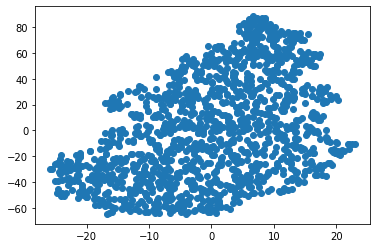

In [57]:
import matplotlib.pyplot as plt

plt.scatter(plot_data[:,0],plot_data[:,1])

It looks like there are some really interesting things going on in that space.

In *Acting Out 2*, we'll take a look at how we might use clustering algorithms on these embeddings to see whether there are identifiable groups or types of actors.  After that, we'll explore how these embeddings can be used for predictive tasks in *Acting Out 3*.